<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/3-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN최근접 이웃 구하기
중요 포인트
 * reshape으로 배열 크기 재조정(메모리 줄이기 가능)
 * 결정계수 R^2(제곱의 이유는 0 이상의 수로 표현하기 위해서인 듯)
 * 훈련세트>테스트 세트 : 과대적합
 * 훈련세트<테스트 세트 OR 둘다 낮음 : 과소적합

In [1]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

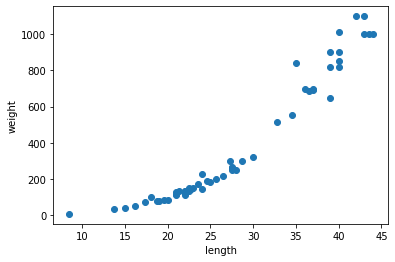

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

In [4]:
test_array=np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array=test_array.reshape(2,2) # reshape안에 들어가는 숫자들에 총 곱셈합은 test_array에 넣어준 shape크기와 같아야 한다
print(test_array.shape)

(2, 2)


In [8]:
train_input=train_input.reshape(-1,1) # -1은 나머지 원소 개수로 모두 채우라는 의미!
test_input=test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [10]:
print(knr.score(test_input,test_target))

0.992809406101064


In [11]:
from sklearn.metrics import mean_absolute_error
test_prediction=knr.predict(test_input) # 테스트 세트 예측
mae=mean_absolute_error(test_target,test_prediction) # 테스트 세트에 대한 평균 절댓값 오차 계산
print(mae) # 이제 훈련 세트로 평가 ㄱㄱ

19.157142857142862


In [12]:
print(knr.score(train_input,train_target)) # 테스트 값이 왜 더 높지...

0.9698823289099254


In [13]:
# 아! 이게 바로 과소적합이구나!
knr.n_neighbors=3 # 이웃 갯수 조정
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [14]:
# 과대적합되었는지 테스트
print(knr.score(test_input,test_target))

0.9746459963987609
